In [ ]:
mapped_genes_path = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/thesis/Kp_std/03_refinement/step1-extension/genes_mapped.csv'

chem_prop_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/chem_prop.tsv'
chem_xref_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/chem_xref.tsv'
reac_prop_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/reac_prop.tsv'
reac_xref_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/reac_xref.tsv'

In [ ]:
draft_model_path = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/thesis/Kp_std/02_generate_draft_model/Kp_std_draft.xml'



### Testing the modules

In [ ]:
# bidirectional_blast
# works again

# logging done, save for DIAMOND output

from specimen.hqtb.core import bidirectional_blast

template='/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/annotated_genomes/GCF_000240185.1.gbff'
input = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/annotated_genomes/Kp_MD01/AB-1_S128.faa'
dir='/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
template_name=None
input_name=None
temp_header='protein_id'
in_header='locus_tag'
threads=2
extra_info=['locus_tag', 'product', 'protein_id']
sensitivity='more-sensitive'

bidirectional_blast.run(template, input, dir,
                        template_name, input_name, 
                        temp_header, in_header, 
                        threads, extra_info, sensitivity)

INFO:specimen.hqtb.core.bidirectional_blast:Given directory already has required structure: FASTA


In [ ]:
# generate_draft_model
# works

# logging partially done

from specimen.hqtb.core import generate_draft_model

template = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/template-models/_iKPM22LL_with_minimal_medium_anaerobic.xml'
bpbbh = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/01_bidirectional_blast/AB-1_S128_GCF_000240185.1_bbh.tsv'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
edit_names='dot-to-underscore'
pid=80.0
name='test_kp'
medium='default'
namespace='BiGG'
memote=False

generate_draft_model.run(template,bpbbh,dir,edit_names,
                         pid,name,medium,namespace,memote)

INFO:specimen.hqtb.core.generate_draft_model:Given directory already exists: /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing
INFO:root:In this model the following 1 biomass reaction(s) were
        identified: Growth


In [ ]:
# refinement - extension
#
# @TODO

from specimen.hqtb.core.refinement import extension

draft = ''
gene_list = ''
fasta = ''
db = ''
dir = ''
mnx_chem_prop = ''
mnx_chem_xref = ''
mnx_reac_prop = ''
mnx_reac_xref = ''
ncbi_map = ''
ncbi_dat = ''
id='locus_tag'
sensitivity='more-sensitive'
coverage=95.0
pid=90.0
threads:int=2
exclude_dna=True
exclude_rna=True
memote=False

extension.run(draft, gene_list, fasta, db, dir, 
              mnx_chem_prop, mnx_chem_xref, mnx_reac_prop, mnx_reac_xref,
              ncbi_map, ncbi_dat, id, sensitivity, coverage, pid,threads,
              exclude_dna,exclude_rna, memote)

In [ ]:
# refinement - cleanup
#
# @TODO

from specimen.hqtb.core.refinement import cleanup

model = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step1-extension/Kp_std_extended.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
biocyc_db = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/BioCyc/Reactions_MetaCyc.txt'
check_dupl_reac = True
check_dupl_meta = 'default'
remove_unused_meta = False 
remove_dupl_reac = True
remove_dupl_meta = True
universal = None
media_path = None 
namespace = 'BiGG' 
growth_threshold = 0.05
iterations=3
chunk_size=10000
memote = False

cleanup.run(model, dir, biocyc_db, 
            check_dupl_reac, check_dupl_meta, remove_unused_meta, 
            remove_dupl_reac, remove_dupl_meta,
            universal, media_path, namespace, 
            growth_threshold, iterations, chunk_size,
            memote)

In [ ]:
# refinement - annotation
# seems to run
# find bettwe way to save the memote run -> logging!!!
# CARFUL: Multiple future warnings for pandas!!!


from specimen.hqtb.core.refinement import annotation

model = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step2-clean-up/Kp_std_clean.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
kegg_viaEC = False
kegg_viaRC = False
memote = True

annotation.run(model, dir, kegg_viaEC, kegg_viaRC, memote)


refinement step 3: annotation
################################################################################

Creating new directory /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/step3-annotation

# ------------------
# add SBO annotation
# ------------------


INFO:root:Modified model written to /var/folders/xd/zl0vk7sj60xcc0zmc4k4mxxc0000gr/T/tmpt156r6yl/tempmodel.xml


Active reaction but reversible R_GALpts

Assign SBO terms via E.C. numbers: 



100%|██████████| 2947/2947 [03:48<00:00, 12.89it/s] 



Model with SBO annotations written to /var/folders/xd/zl0vk7sj60xcc0zmc4k4mxxc0000gr/T/tmpt156r6yl/dud.xml ...



INFO:root:Modified model written to /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/step3-annotation/Kp_std_SBOannotated.xml
INFO:cobra.core.model:The current solver interface glpk doesn't support setting the optimality tolerance.


	time: 236.04825711250305s

# ----------------
# add KEGG pathway
# ----------------


100%|██████████| 2947/2947 [02:58<00:00, 16.50it/s] 


	time: 178.65643072128296s

# -------------------
# Analyse with MEMOTE
# -------------------
============================= test session starts ==============================
platform darwin -- Python 3.12.7, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/brune
plugins: typeguard-4.4.1, anyio-4.6.2.post1
collected 146 items / 1 skipped

../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_annotation.py . [  0%]
..FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...FF.....F.....FF.F.F.FF.FFFFF         [ 44%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_basic.py . [ 45%]
.....F...........FFFF

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.
INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


F                                                   [ 60%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_biomass.py . [ 60%]
......F.F                                                                [ 67%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_consistency.py 

INFO:memote.support.consistency:model 'Kp_std' has 2575 internal reactions
INFO:memote.support.consistency:model 'Kp_std' has 1891 internal metabolites


. [ 67%]


INFO:memote.support.consistency:model 'Kp_std' has 2575 internal reactions
INFO:memote.support.consistency:model 'Kp_std' has 1891 internal metabolites


.

INFO:memote.support.consistency:model 'Kp_std' has 2575 internal reactions
INFO:memote.support.consistency:model 'Kp_std' has 1891 internal metabolites


............ss..FFF

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


FF

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


F

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


FF

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


F

INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.


FF                                             [ 86%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_essentiality.py s [ 87%]
                                                                         [ 87%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_growth.py s [ 88%]
                                                                         [ 88%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_matrix.py . [ 89%]
...                                                                      [ 91%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_sbml.py F [ 91%]
F                                                                        [ 92%]
../../../../miniconda3/envs/test-dev/lib/python3.12/site-packages/memote/suite/tests/test_sbo.py F [ 93%]
FFFFFFFsF.                                                               [100%]


In [ ]:
# refinement - smoothing
# @TODO not tested with mcc yet
# @TODO EGC stuff not implemented fully in the smoothing part !


from specimen.hqtb.core.refinement import smoothing

genome = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/annotated_genomes/Kp_MD01/AB-1_S128.fna'
model = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step3-annotation/Kp_std_annotated.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
mcc ='skip'
egc_solver = 'greedy'
namespace='BiGG'
dna_weight_frac=0.023
ion_weight_frac=0.05
memote=False

smoothing.run(genome, model, dir, mcc, egc_solver, namespace, dna_weight_frac, ion_weight_frac,memote)


refinement step 4: smoothing
################################################################################

Creating new directory /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/step4-smoothing
Creating new directory /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/manual_curation


INFO:cobra.core.model:The current solver interface glpk doesn't support setting the optimality tolerance.
/Users/brune/Documents/10_Code/refinegems/build/__editable__.refineGEMs-2.0.0a2-py3-none-any/refinegems/classes/medium.py:298: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined.substance_table = pd.concat([combined.substance_table, second_medium], ignore_index=True)
INFO:cobra.medium.boundary_types:Compartment `e` sounds like an external compartment. Using this one without counting boundary reactions.



# ------------------------
# mass and charge curation
# ------------------------
	skipped

# ---------------------------------------------
# # check for energy generating cycles
# ---------------------------------------------
GreedyEGCSolver:
No EGCs present, nothing to solve.
	time: 0.8624157905578613s

# ----------
# adjust BOF
# ----------


INFO:root:In this model the following 1 biomass reaction(s) were
        identified: Growth
/Users/brune/miniconda3/envs/test-dev/lib/python3.12/site-packages/BOFdat/core/dna.py:19: UserWarning: 439 handles in the genome file.This may indicate that your genome is not completely assembled. 
BOFdat will parse the contigs but the stoichiometric coefficients may not be accurate.
  warnings.warn('%s handles in the genome file.This may indicate that your genome is not completely assembled. \nBOFdat will parse the contigs but the stoichiometric coefficients may not be accurate.'%(len(genome),))
INFO:cobra.core.model:The current solver interface glpk doesn't support setting the optimality tolerance.
INFO:cobra.core.model:The current solver interface glpk doesn't support setting the optimality tolerance.


Generating list of solvable metabolites


INFO:root:In this model the following 1 biomass reaction(s) were
        identified: Growth


['nad_c', 'nadh_c', 'coa_c', 'nadph_c', 'nadp_c', 'pyr_c', 'amp_c', 'nh4_c', 'glu__L_c', 'accoa_c', 'pep_c', 'ca2_c', 'cl_c', 'cobalt2_c', 'cu2_c', 'fe2_c', 'fe3_c', 'h_c', 'k_c', 'mg2_c', 'mn2_c', 'mobd_c', 'na1_c', 'nh4_c', 'ni2_c', 'so4_c', 'zn2_c']


INFO:root:In this model the following 1 biomass reaction(s) were
        identified: Growth
                which is outside of the 1e-03 margin from 1 mmol / g[CDW] / h.
                
INFO:root:The component molar mass of the biomass reaction Growth sums up to 0.9999999999999979
                which is inside the 1e-03 margin from 1 mmol / g[CDW] / h.
                
INFO:root:For reaction 'Growth' the coefficients changed.


	time: 14.490718126296997s

# ----------
# save model
# ----------
	saving to: /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/step4-smoothing/Kp_std_smooth.xml


In [1]:
# validation
# works

from specimen.hqtb.core import validation

dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
model_path = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step4-smoothing/Kp_std_smooth.xml'
tests = None
run_all = True

validation.run(dir, model_path, tests=None, run_all=True)

INFO:specimen.hqtb.core.validation:Given directory already has required structure.


INFO:specimen.hqtb.core.analysis:
analysis
################################################################################

INFO:specimen.hqtb.core.analysis:Given directory already has required structure.
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'HO*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'C8H14NOS2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'HO2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' foun

Given directory already has required structure.


INFO:refinegems.utility.util:In this model the following 1 biomass reaction(s) were
        identified: Growth
/Users/brune/Documents/10_Code/refinegems/build/__editable__.refinegems-2.0.0a2-py3-none-any/refinegems/classes/medium.py:270: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.substance_table["flux"] = self.substance_table["flux"].fillna(flux)
/Users/brune/Documents/10_Code/refinegems/build/__editable__.refinegems-2.0.0a2-py3-none-any/refinegems/classes/medium.py:270: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.substance_table["flux"] =

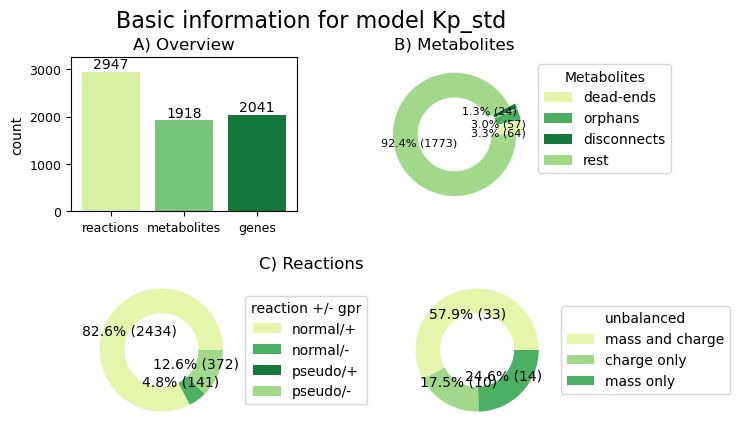

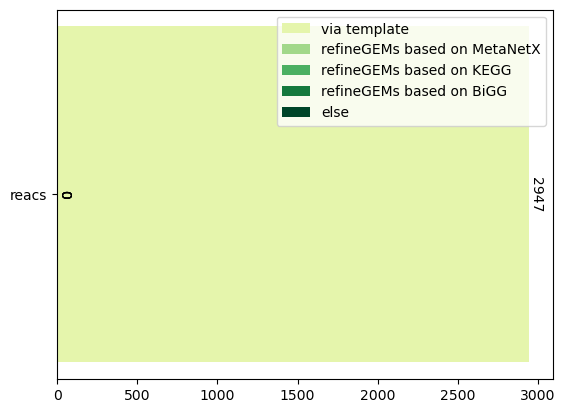

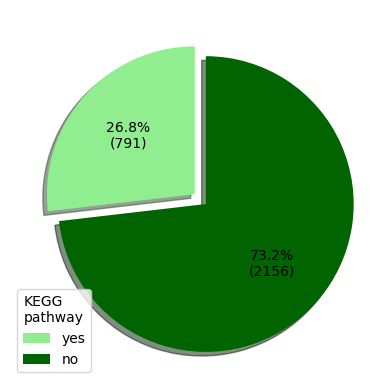

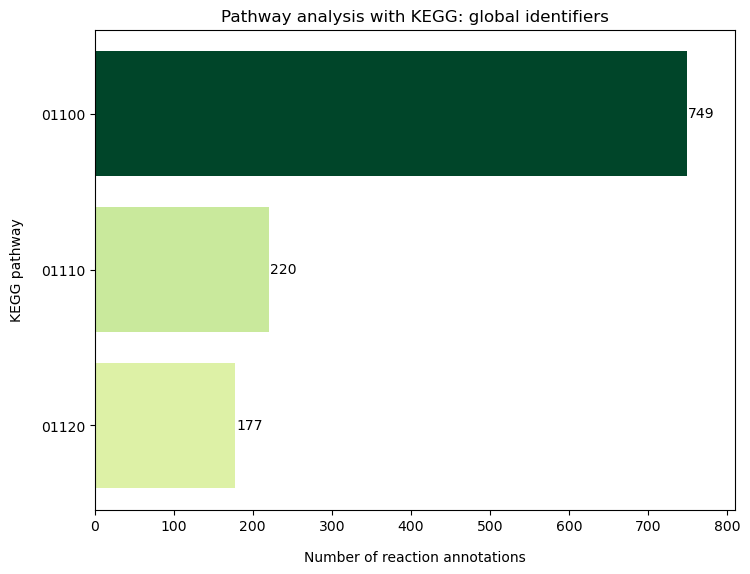

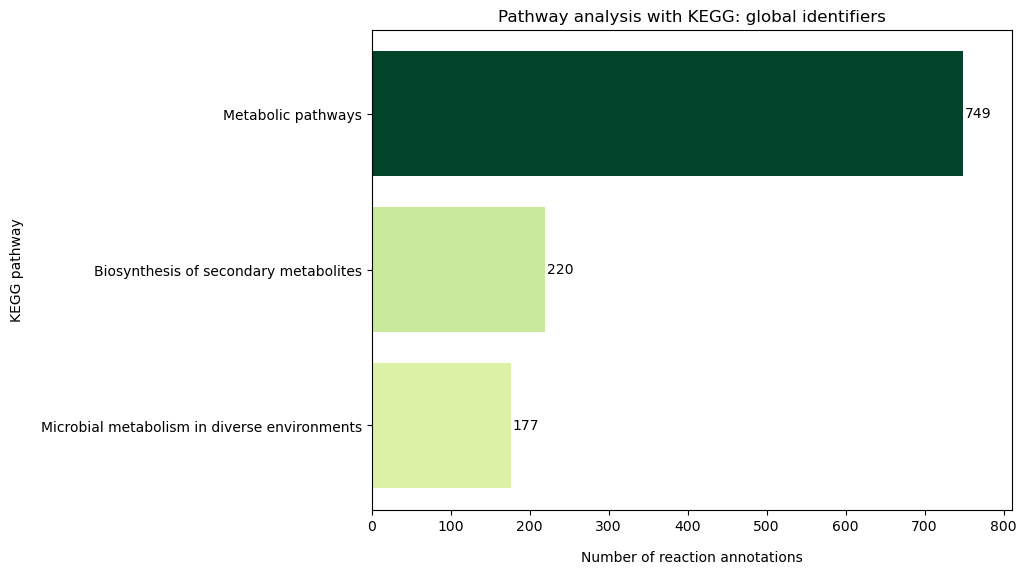

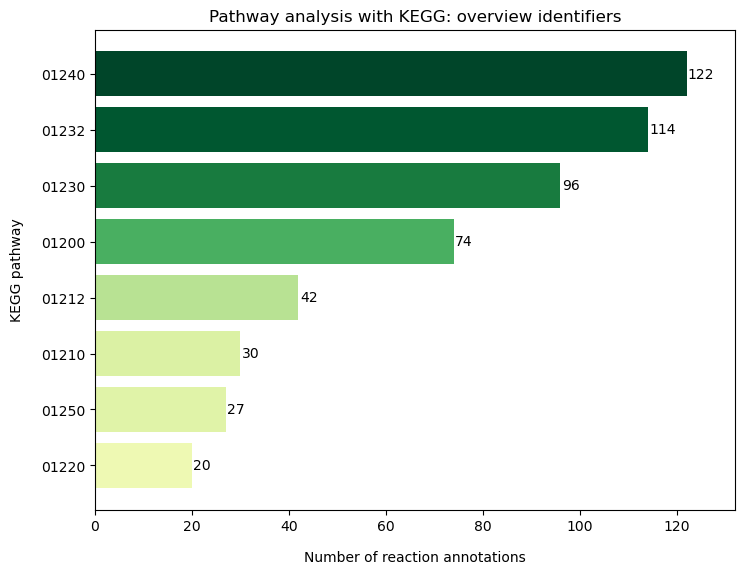

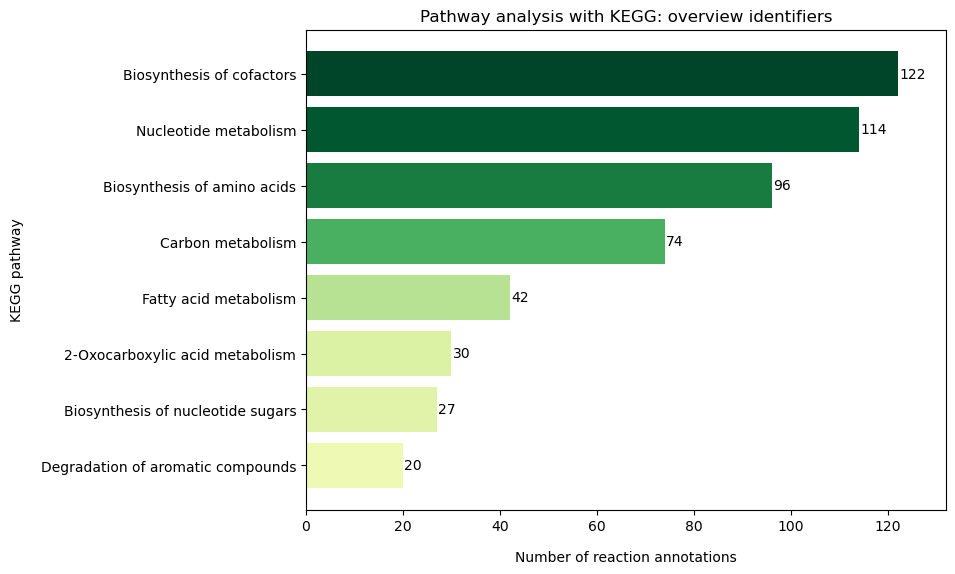

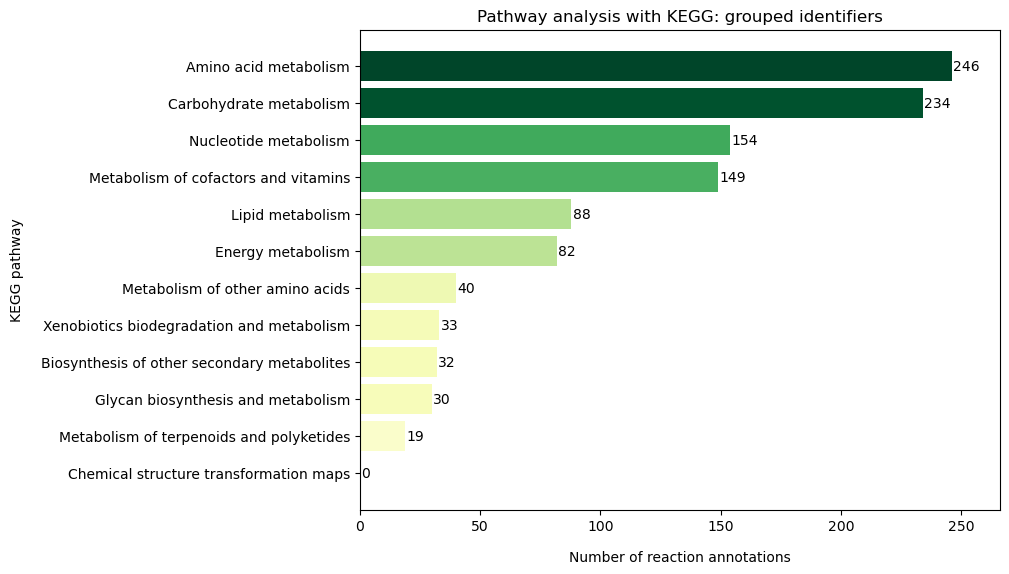

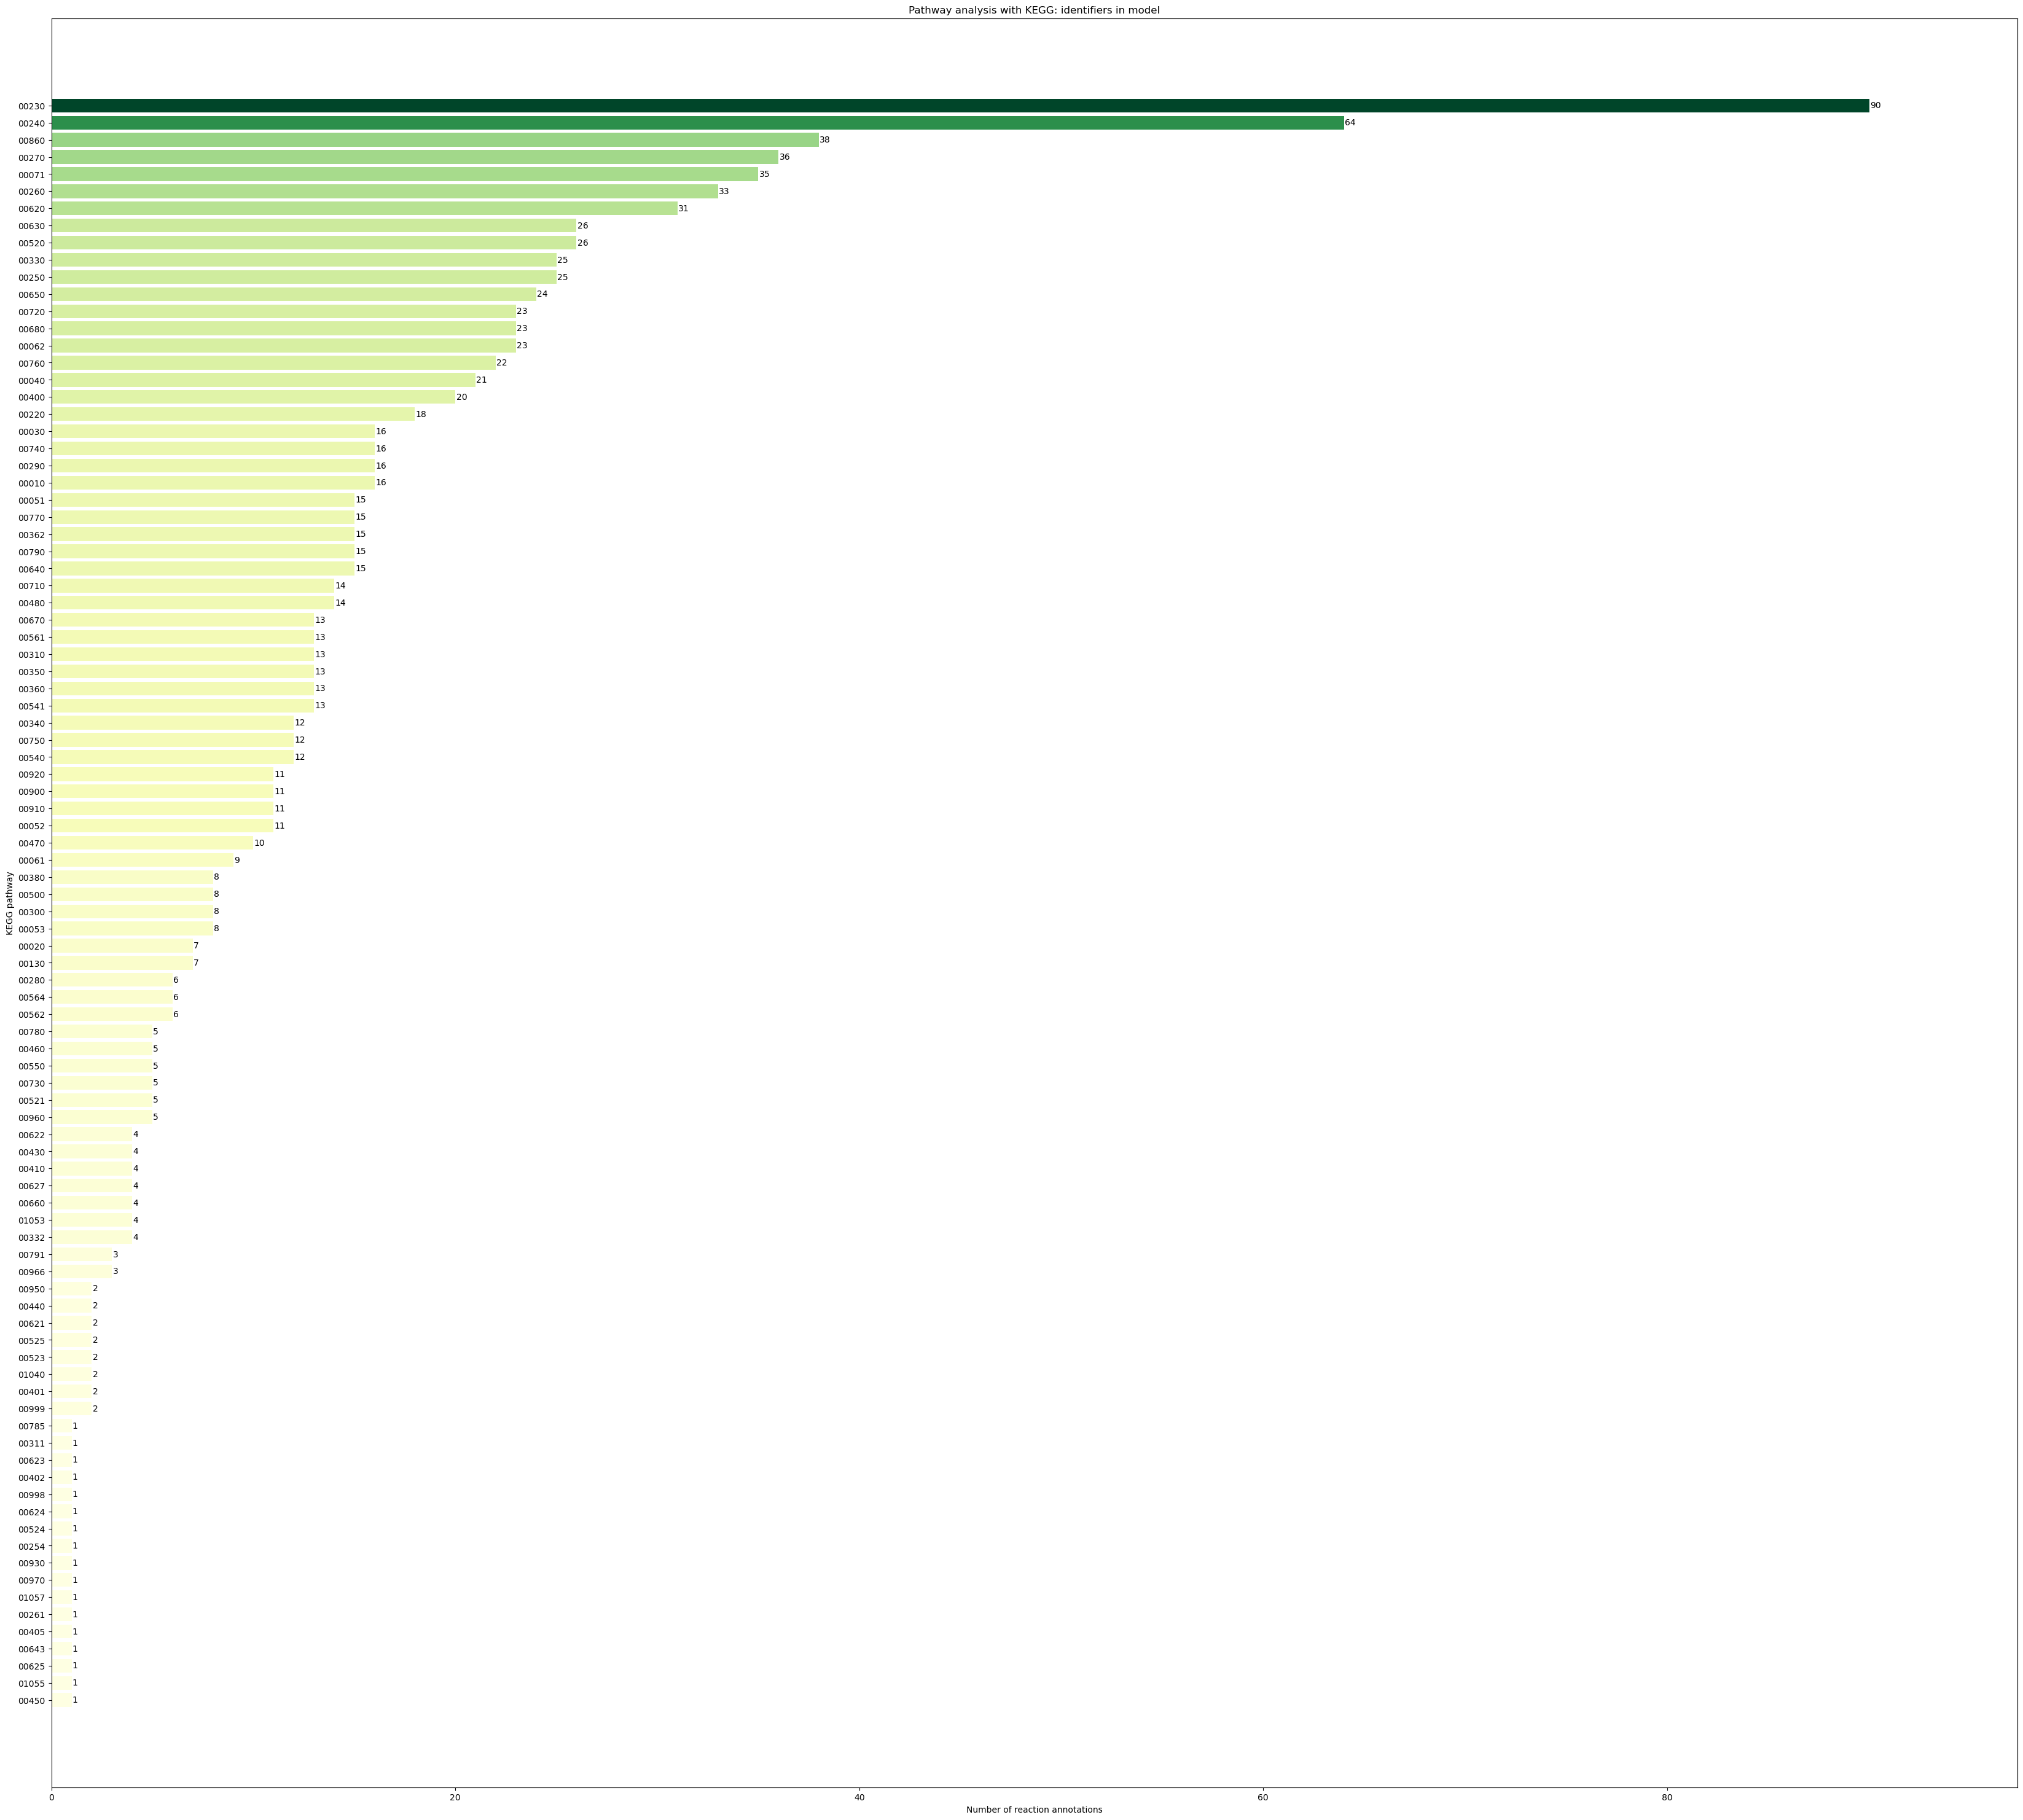

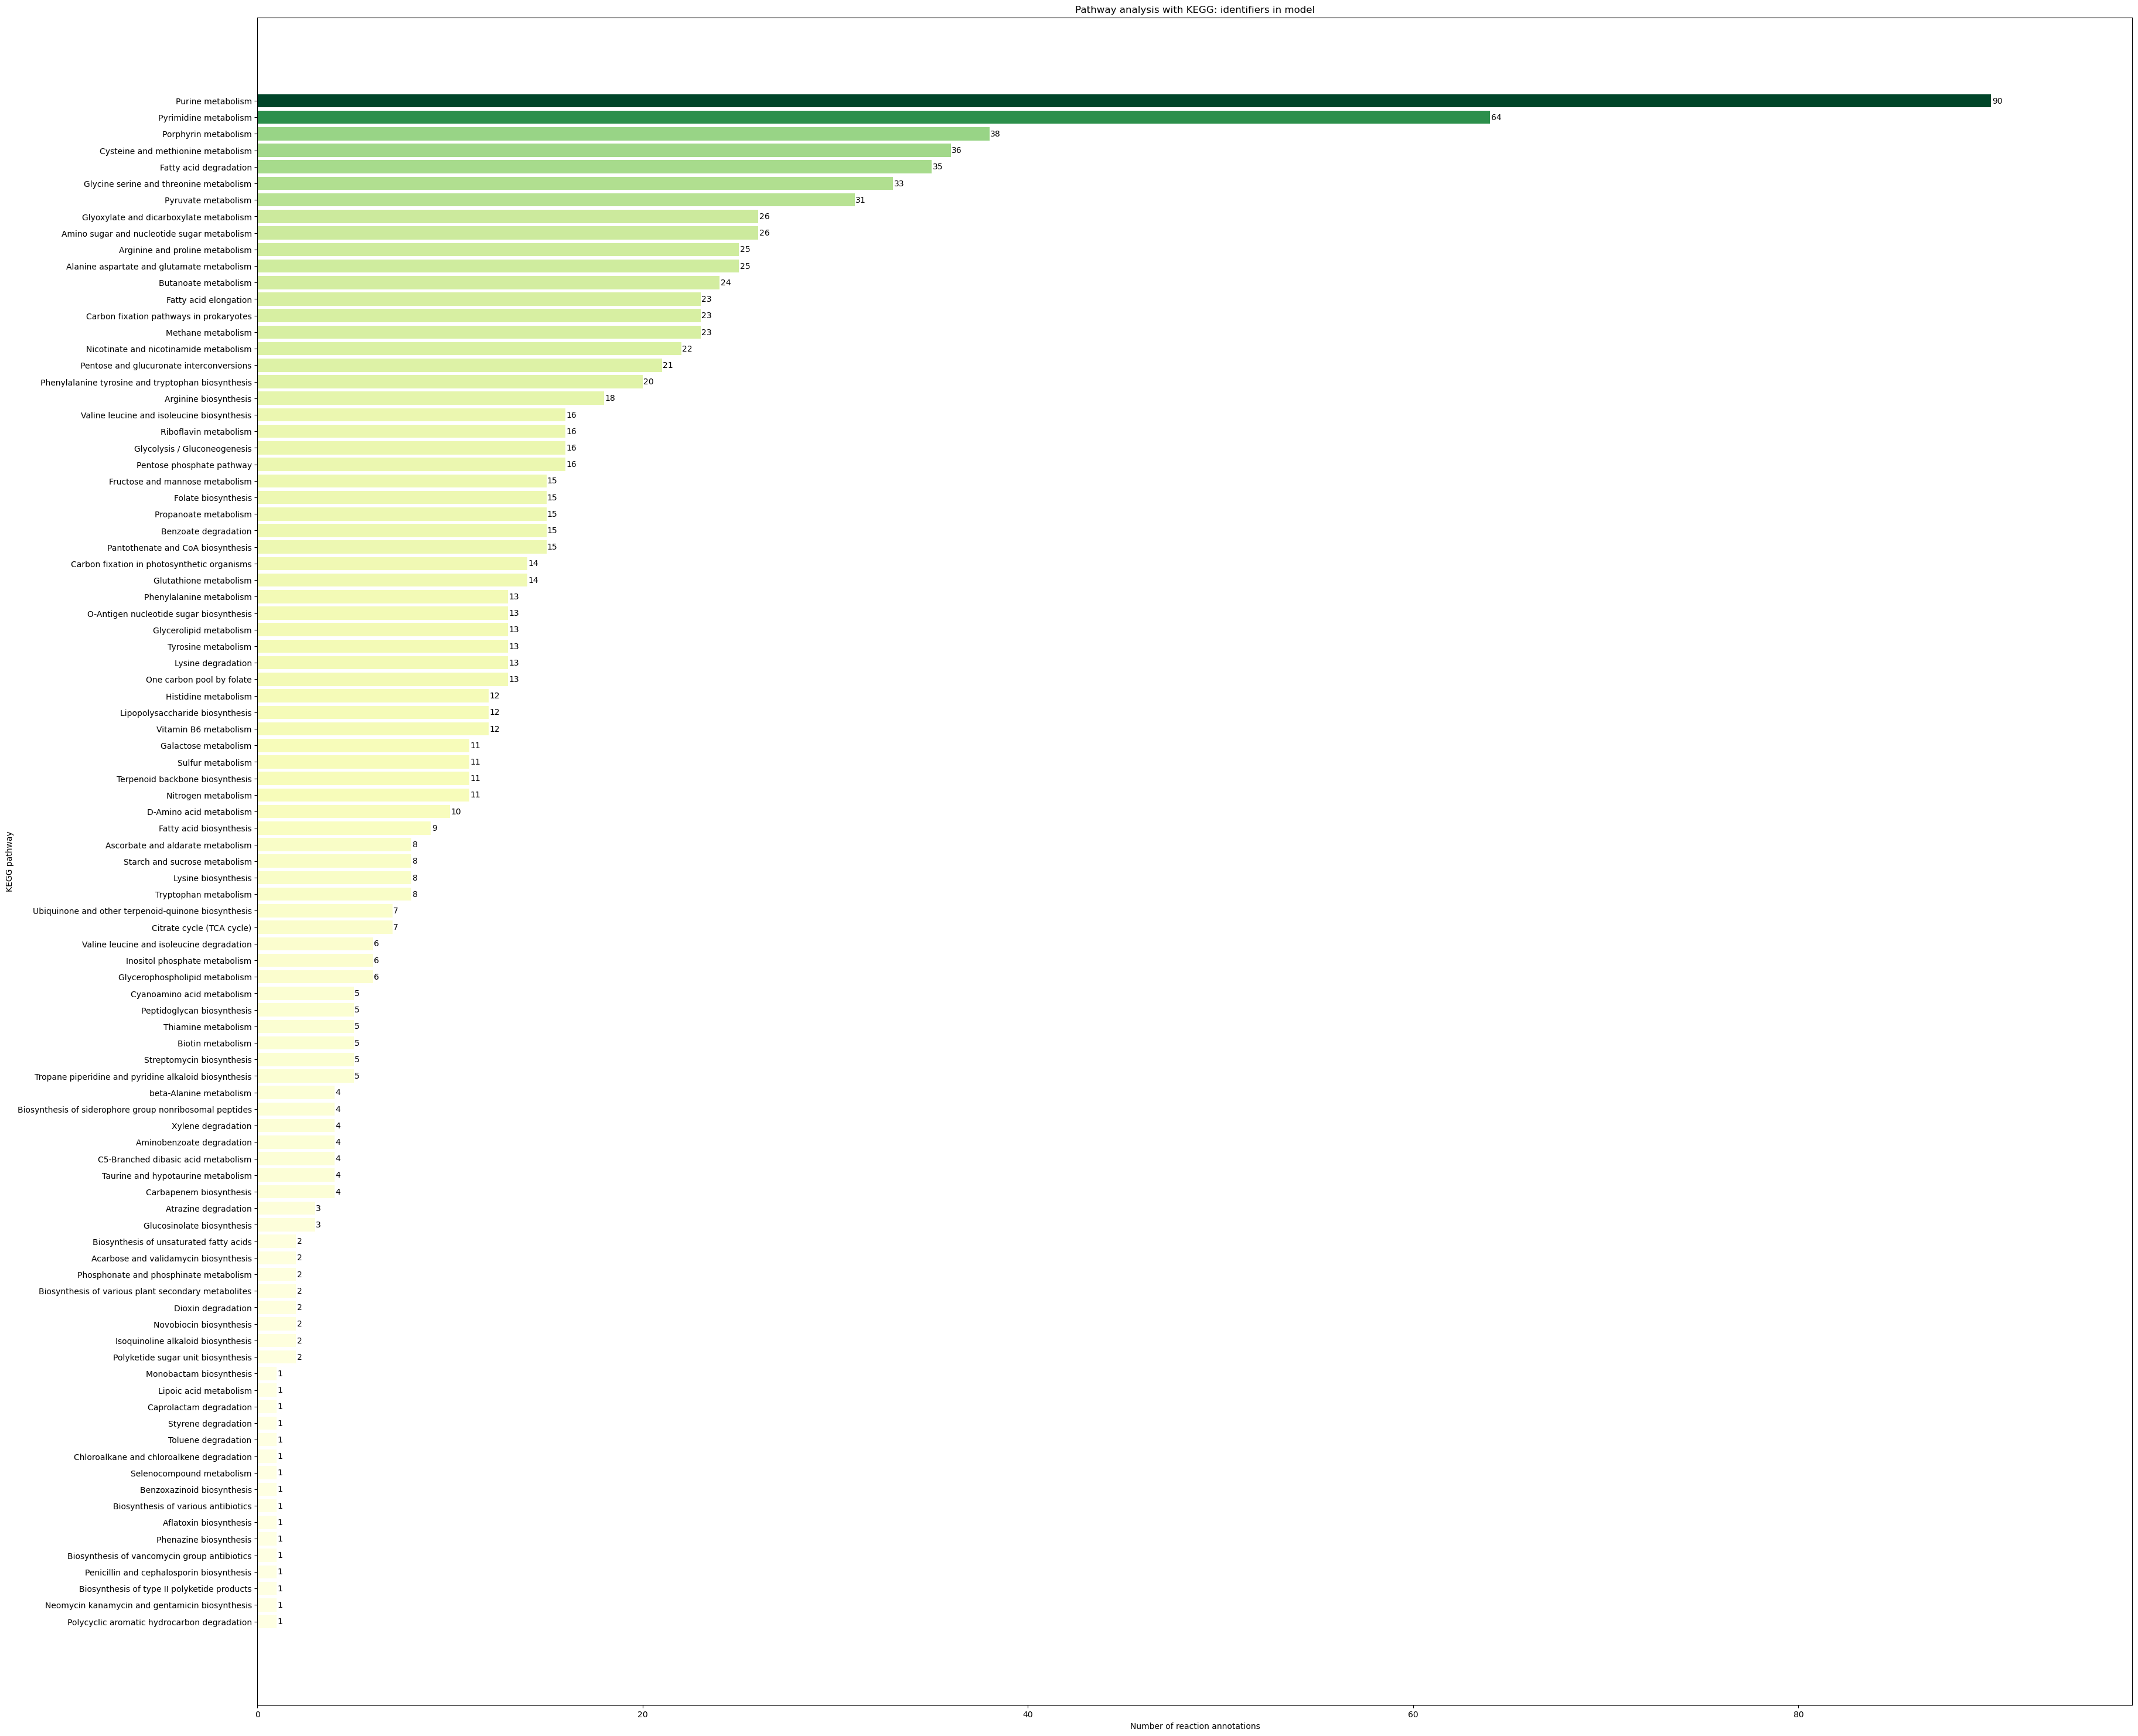

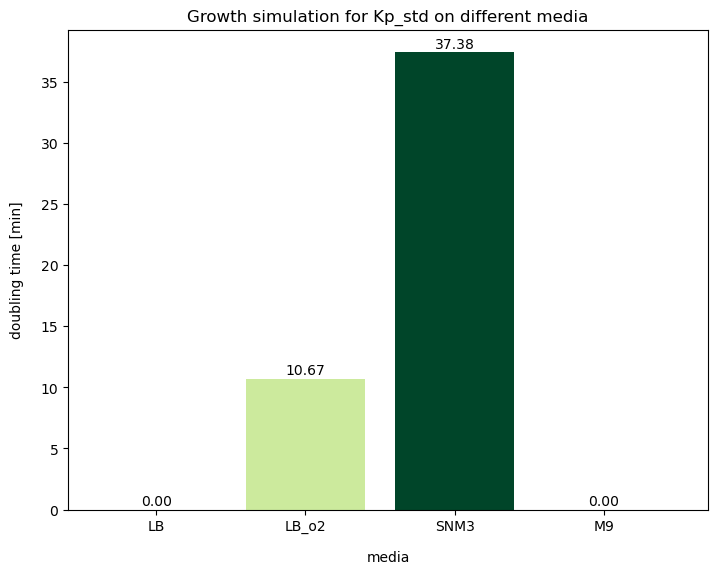

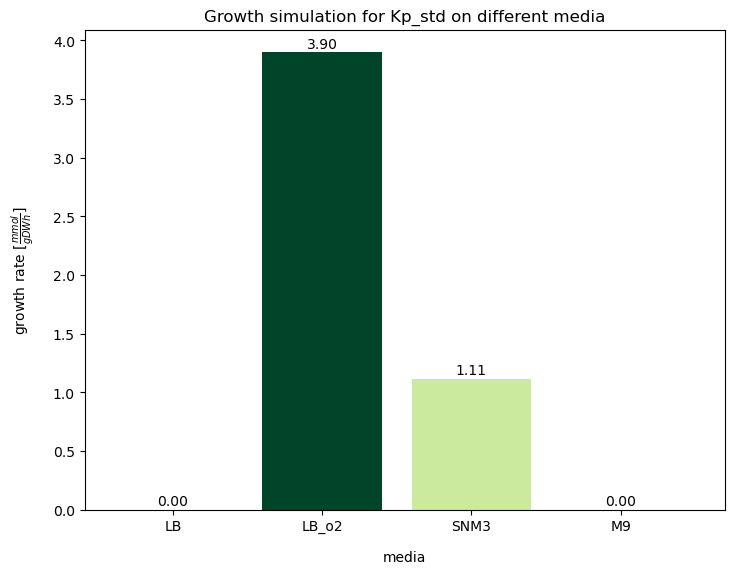

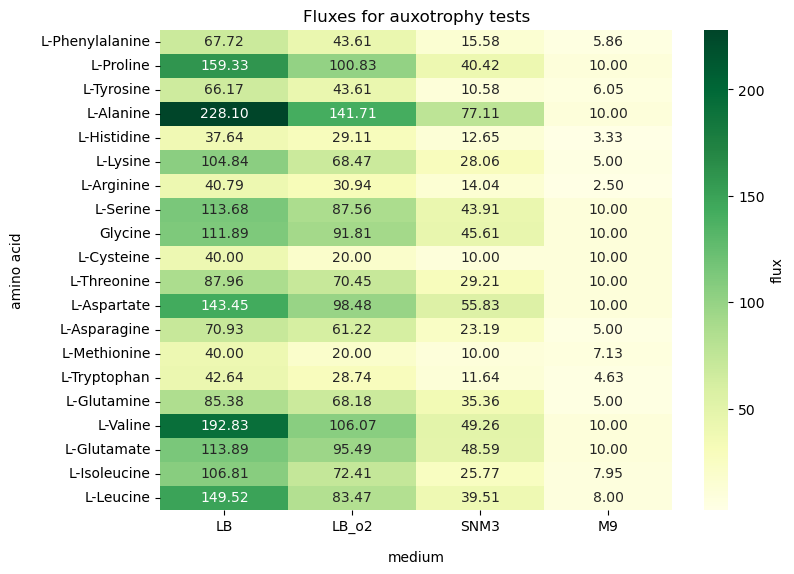

In [1]:
# analysis
# seems to work
# better logging and stuff
# watch out for future warning, esp. for pandas

from specimen.hqtb.core import analysis

model_path = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step4-smoothing/Kp_std_smooth.xml'
dir = './test_hqtb/area51/'
media_path= '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing_old/media_config.yml'
namespace='BiGG'
pc_model_path=None
pc_based_on='id'
test_aa_auxotrophies=True
pathway=True

analysis.run(model_path, dir, 
        media_path, namespace,
        pc_model_path, pc_based_on, 
        test_aa_auxotrophies, pathway)

### Test CMPB

In [ ]:
from specimen.cmpb.workflow import run

cfg = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/cmpb/config.yaml'
run(cfg)

In [ ]:
import cobra

cobra.io.sbml.validate_sbml_model(model)